**GATED RECURRENT UNIT(GRU) MODEL**

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

**Import and prepare Data**

In [25]:
# Load your data
df = pd.read_csv("Nigeria_Inflation.csv")

In [26]:
#Let's fix this by specifying the correct delimiter (most likely a comma) 
#and properly splitting it into individual columns. 

df = pd.read_csv("Nigeria_Inflation.csv", header=None)
split_df = df[0].str.split(",", expand=True)
split_df.columns = split_df.iloc[0]
df = split_df[1:].reset_index(drop=True)

In [28]:
df

,Year,Month,Inflation_Rate,Crude Oil Price,Production,Crude Oil Export,CPI_Food,CPI_Energy,CPI_Health,CPI_Transport,CPI_Communication,CPI_Education,Date
0,2008,1,8.6,94.26,2.17,1.72,75.53443079,84.612846,83.86313858,86.53003755,83.12944045,75.2844657,2008-01-01
1,2008,2,8,98.15,2.08,1.63,75.15418502,85.23163236,83.3658912,88.35523571,82.88981376,75.45761873,2008-02-01
2,2008,3,7.8,103.73,2.06,1.61,78.24252261,83.25151603,86.08299296,84.37630371,81.89347122,74.82684697,2008-03-01
3,2008,4,8.2,116.73,1.96,1.51,79.43426849,84.34883049,89.44533239,88.60033375,93.93786522,73.66424802,2008-04-01
4,2008,5,9.7,126.57,2.05,1.6,80.78367725,85.57402747,90.54046055,87.93283271,97.55328541,74.88044195,2008-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2024,2,31.7,86.08,1.32,0.87,846.8465333,543.8939686,494.8445684,570.0340878,234.2289477,469.8997124,2024-02-01
194,2024,3,33.2,88.8,1.23,0.78,877.4728633,558.8130161,502.9126866,579.8214526,234.6946536,476.8902921,2024-03-01
195,2024,4,33.69,93.12,1.28,0.83,899.4533859,571.960431,510.0958787,592.2827526,235.3359754,483.7198405,2024-04-01
196,2024,5,33.95,84.01,1.25,0.8,920.0052812,583.8941583,517.3917841,606.4080759,235.8504055,490.7797919,2024-05-01


In [27]:
# Combine 'Year' and 'Month' into a datetime column
df['Date'] = pd.to_datetime(df['Year'] + '-' + df['Month'], errors='coerce')

In [33]:
# Convert numeric columns
numeric_columns = df.columns.drop(['Year', 'Month', 'Date'])
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

**Drop Missing Value**

In [34]:
# Drop rows with missing values
df = df.dropna().reset_index(drop=True)

In [35]:
df

,Year,Month,Inflation_Rate,Crude Oil Price,Production,Crude Oil Export,CPI_Food,CPI_Energy,CPI_Health,CPI_Transport,CPI_Communication,CPI_Education,Date
0,2008,1,8.60,94.26,2.17,1.72,75.534431,84.612846,83.863139,86.530038,83.129440,75.284466,2008-01-01
1,2008,2,8.00,98.15,2.08,1.63,75.154185,85.231632,83.365891,88.355236,82.889814,75.457619,2008-02-01
2,2008,3,7.80,103.73,2.06,1.61,78.242523,83.251516,86.082993,84.376304,81.893471,74.826847,2008-03-01
3,2008,4,8.20,116.73,1.96,1.51,79.434268,84.348830,89.445332,88.600334,93.937865,73.664248,2008-04-01
4,2008,5,9.70,126.57,2.05,1.60,80.783677,85.574027,90.540461,87.932833,97.553285,74.880442,2008-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,2024,2,31.70,86.08,1.32,0.87,846.846533,543.893969,494.844568,570.034088,234.228948,469.899712,2024-02-01
193,2024,3,33.20,88.80,1.23,0.78,877.472863,558.813016,502.912687,579.821453,234.694654,476.890292,2024-03-01
194,2024,4,33.69,93.12,1.28,0.83,899.453386,571.960431,510.095879,592.282753,235.335975,483.719840,2024-04-01
195,2024,5,33.95,84.01,1.25,0.80,920.005281,583.894158,517.391784,606.408076,235.850405,490.779792,2024-05-01


In [55]:

df = df.sort_values(by='Date').reset_index(drop=True)

In [56]:
# View result
print(df[['Date'] + list(numeric_columns)].head())

0       Date  Inflation_Rate  Crude Oil Price  Production  Crude Oil Export  \
0 2008-01-01             8.6            94.26        2.17              1.72   
1 2008-02-01             8.0            98.15        2.08              1.63   
2 2008-03-01             7.8           103.73        2.06              1.61   
3 2008-04-01             8.2           116.73        1.96              1.51   
4 2008-05-01             9.7           126.57        2.05              1.60   

0   CPI_Food  CPI_Energy  CPI_Health  CPI_Transport  CPI_Communication  \
0  75.534431   84.612846   83.863139      86.530038          83.129440   
1  75.154185   85.231632   83.365891      88.355236          82.889814   
2  78.242523   83.251516   86.082993      84.376304          81.893471   
3  79.434268   84.348830   89.445332      88.600334          93.937865   
4  80.783677   85.574027   90.540461      87.932833          97.553285   

0  CPI_Education  
0      75.284466  
1      75.457619  
2      74.826847  
3   

**Define Features and Target**

In [57]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Use 'Inflation Rate' as target and other features as predictors
features = ['Crude Oil Price', 'Production', 'Crude Oil Export',
            'CPI_Food', 'CPI_Energy', 'CPI_Health', 'CPI_Transport',
            'CPI_Communication', 'CPI_Education']

target = 'Inflation_Rate'

In [38]:
df_model = df[['Date'] + features + [target]]

**Scale the features and target**

In [58]:
# Scale the features and target
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_model[features + [target]])

**Create Sequence for GRU Model**

In [59]:
# Convert to sequences (e.g., past 12 months → next month)
def create_sequences(data, seq_length=12):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, :-1])  # Features
        y.append(data[i + seq_length, -1])     # Target (Inflation Rate)
    return np.array(X), np.array(y)

In [60]:
# Generate sequences
X, y = create_sequences(scaled_data, seq_length=12)

**Split into Train and Test**

In [61]:
# Train-test split (80-20)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [62]:
# Show shape of GRU-ready data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (148, 12, 9)
y_train shape: (148,)


**Fit Model**

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [74]:
# Build the GRU model
gru_model = Sequential()
gru_model.add(GRU(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(32))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1))

C:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [75]:
# Compile the model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

In [76]:
# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)



**Train Model**

In [77]:
# Fit the model
history = gru_model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 296ms/step - loss: 0.0592 - val_loss: 0.0335
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0366 - val_loss: 0.1070
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0177 - val_loss: 0.2006
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0170 - val_loss: 0.1424


**Make Predictions on Test Data**

In [78]:
# Predict on test set
y_pred = gru_model.predict(X_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


**Evaluation**

In [79]:

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"GRU Model - MAE: {mae:.4f}, RMSE: {rmse:.4f}")

GRU Model - MAE: 0.1378, RMSE: 0.1831


In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 0.13781105856344578, RMSE: 0.18313074207032795


**Plot Actual vs Predicted Inflation Rates**

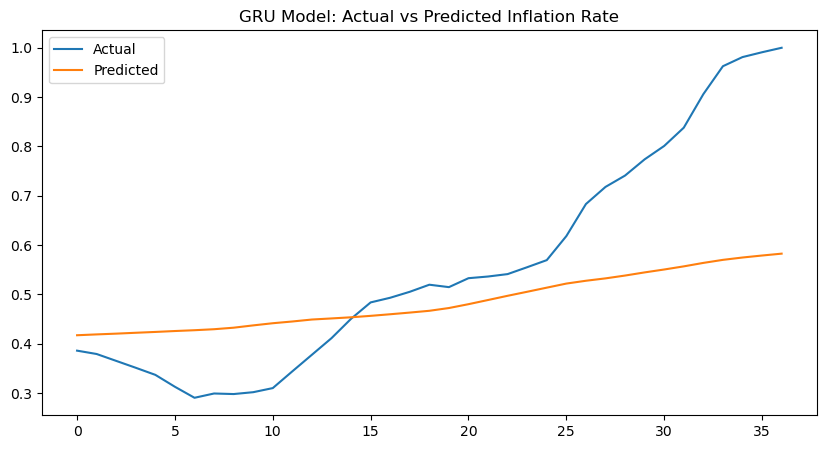

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('GRU Model: Actual vs Predicted Inflation Rate')
plt.legend()
plt.show()